# Solución correcta

fuimos probando diferentes modelos, donde cambiábamos cómo realizábamos el mapeo.
- El modelo donde tipo1:1 y el resto 0 tuvo una precisión cercana al 92%
- El modelo donde tipo2:1 y el resto 0 tuvo una precisión cercana al 99%
- El modelo donde tipo3:1 y el resto 0 tuvo una precisión cercana al 92%

In [170]:
FUENTES_DIR  = '../Fuentes'
DATOS_DIR   = '../Datos/' 

import sys
sys.path.append(FUENTES_DIR)

import pandas as pd
import numpy as np
from matplotlib import pylab as plt
from sklearn import model_selection,preprocessing, metrics
from ClassPerceptron import Perceptron

In [171]:
datos = pd.read_csv(DATOS_DIR + "Semillas.csv")
mapeo = {'Clase': {'Tipo1':0, 'Tipo2':0,'Tipo3':1}}
datos.replace(mapeo,inplace=True)

datos.head()

,Area,Perimetro,Compacidad,LongNucleo,AnchoNucleo,Asimetria,LongSurco,Clase
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [172]:
X = np.array(datos.iloc[:,:-1])
T = np.array(datos['Clase'])

X_train, X_test, T_train, T_test = model_selection.train_test_split(
        X, T, test_size=0.30, random_state=42)

normalizador= preprocessing.StandardScaler() #media y desvío
X_train = normalizador.fit_transform(X_train)
X_test  = normalizador.transform(X_test)

print(X_test)

[[-0.59266621 -0.58718331 -0.15859162 -0.43797084 -0.75573625 -1.92059837
  -0.75288629]
 [-1.23531883 -1.23348841 -1.15455703 -1.27022837 -1.31155634  0.38159685
  -0.86842991]
 [ 1.56651057  1.61025402  0.32504591  1.63585119  1.40986465 -0.51624529
   1.57655568]
 [-0.72867735 -0.92174124  1.07919256 -1.30433728 -0.28381354 -0.60556292
  -1.21918734]
 [-1.18431465 -1.31712789 -0.07252054 -1.45214258 -1.08346036 -0.69088125
  -1.67929855]
 [-1.26252105 -1.17265969 -1.83492847 -0.90185209 -1.54227411  1.38408726
  -0.41657182]
 [-0.37504839 -0.41990434  0.38242663 -0.6153372  -0.28381354 -1.45074765
  -0.94889779]
 [-0.92249321 -0.93694842 -0.49877734 -0.92459136 -0.92877458  0.74686596
  -0.54243183]
 [ 0.5226251   0.50012997  0.73490822  0.53981805  0.63381397 -1.17812891
   0.23129778]
 [-0.71847651 -0.8076874   0.34963764 -0.96097421 -0.54861462  1.16412593
  -0.95508763]
 [ 0.83545071  0.88791303  0.34553902  1.13331317  0.81471767 -0.14031138
   1.13501398]
 [-1.35772885 -1.3627

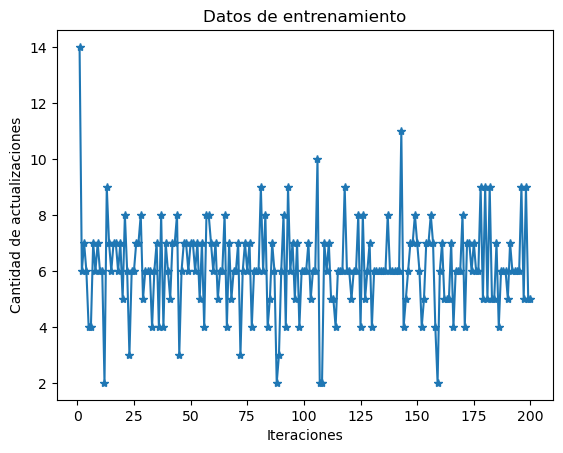

In [173]:
ppn = Perceptron(alpha=0.05, n_iter=200, random_state=None) #random_state=None significa que no utiliza una semilla para la generación de números aleatorios
ppn.fit(X_train, T_train)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='*')
plt.title('Datos de entrenamiento')
plt.xlabel('Iteraciones')
plt.ylabel('Cantidad de actualizaciones')
plt.show()

In [174]:
Y_test = ppn.predict(X_test)
nAciertos = np.sum(Y_test == T_test)
print("Dimensiones de Y_test:", Y_test.shape)
print("Dimensiones de T_test:", T_test.shape)
print("cantidad de tests: ", X_test.shape[0])
print("aciertos: ", nAciertos)
print("%% de aciertos = %.2f %%" % (100 * nAciertos / X_test.shape[0]))

Dimensiones de Y_test: (63,)
Dimensiones de T_test: (63,)
cantidad de tests:  63
aciertos:  58
% de aciertos = 92.06 %
